Importing Libraries and Dataset

In [1]:
# Importing libraries

import numpy as np
import pandas as pd
import os
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns
font = {'size'   : 14}
plt.rc('font', **font)
pd.set_option('display.max_columns', None)


# Import Dataset

#datafile = (r'C:\Users\DELL\Desktop\python\fraud_oracle.csv')
datafile = './fraud_oracle.csv'
dataset = pd.read_csv(datafile)
pd.set_option("display.max.columns", None)


#Inspecting the training Dataset

dataset.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,21,Policy Holder,Sport - Liability,Sport,more than 69000,0,1,12,300,1,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,34,Policy Holder,Sport - Collision,Sport,more than 69000,0,2,15,400,4,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,47,Policy Holder,Sport - Collision,Sport,more than 69000,0,3,7,400,3,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,65,Third Party,Sedan - Liability,Sport,20000 to 29000,0,4,4,400,2,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,27,Third Party,Sport - Collision,Sport,more than 69000,0,5,3,400,1,more than 30,more than 30,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


Data Preprocessing

In [2]:
#Displaying information about our dataset

print("------------>Information about the Dataset<------------")
print()
dataset["FraudFound_P"] = dataset["FraudFound_P"].astype("category")
dataset.info()

------------>Information about the Dataset<------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Month                 15420 non-null  object  
 1   WeekOfMonth           15420 non-null  int64   
 2   DayOfWeek             15420 non-null  object  
 3   Make                  15420 non-null  object  
 4   AccidentArea          15420 non-null  object  
 5   DayOfWeekClaimed      15420 non-null  object  
 6   MonthClaimed          15420 non-null  object  
 7   WeekOfMonthClaimed    15420 non-null  int64   
 8   Sex                   15420 non-null  object  
 9   MaritalStatus         15420 non-null  object  
 10  Age                   15420 non-null  int64   
 11  Fault                 15420 non-null  object  
 12  PolicyType            15420 non-null  object  
 13  VehicleCategory       15420 non-null  object  
 1

In [3]:
print(len(dataset))
dataset.shape
dataset.info

15420


<bound method DataFrame.info of       Month  WeekOfMonth  DayOfWeek     Make AccidentArea DayOfWeekClaimed  \
0       Dec            5  Wednesday    Honda        Urban          Tuesday   
1       Jan            3  Wednesday    Honda        Urban           Monday   
2       Oct            5     Friday    Honda        Urban         Thursday   
3       Jun            2   Saturday   Toyota        Rural           Friday   
4       Jan            5     Monday    Honda        Urban          Tuesday   
...     ...          ...        ...      ...          ...              ...   
15415   Nov            4     Friday   Toyota        Urban          Tuesday   
15416   Nov            5   Thursday  Pontiac        Urban           Friday   
15417   Nov            5   Thursday   Toyota        Rural           Friday   
15418   Dec            1     Monday   Toyota        Urban         Thursday   
15419   Dec            2  Wednesday   Toyota        Urban         Thursday   

      MonthClaimed  WeekOfMonth

In [4]:
#Summary statistics of the dataset

dataset.describe(include=object)

,Month,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,Sex,MaritalStatus,Fault,PolicyType,VehicleCategory,VehiclePrice,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,BasePolicy
count,15420,15420,15420,15420,15420,15420,15420,15420,15420,15420,15420,15420,15420,15420,15420,15420,15420,15420,15420,15420,15420,15420,15420,15420
unique,12,7,19,2,8,13,2,4,2,9,3,6,5,4,4,8,9,2,2,2,4,5,5,3
top,Jan,Monday,Pontiac,Urban,Monday,Jan,Male,Married,Policy Holder,Sedan - Collision,Sedan,20000 to 29000,more than 30,more than 30,2 to 4,7 years,31 to 35,No,No,External,none,no change,1 vehicle,Collision
freq,1411,2616,3837,13822,3757,1446,13000,10625,11230,5584,9671,8079,15247,15342,5485,5807,5593,14992,15333,15179,7047,14324,14316,5962


In [5]:
#Checking the missing values in our dataset if any

dataset.isnull()
dataset.isnull().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
dtype: int64

In [6]:
#Identifying unique values in each columns

cols = dataset.columns.tolist()
print("Columns -> ",cols,"\n\n")
print("Unique values in each column\n")
for i in cols:
    print(dataset[i].unique())

Columns ->  ['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea', 'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex', 'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory', 'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber', 'Deductible', 'DriverRating', 'Days_Policy_Accident', 'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType', 'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year', 'BasePolicy'] 


Unique values in each column

['Dec' 'Jan' 'Oct' 'Jun' 'Feb' 'Nov' 'Apr' 'Mar' 'Aug' 'Jul' 'May' 'Sep']
[5 3 2 4 1]
['Wednesday' 'Friday' 'Saturday' 'Monday' 'Tuesday' 'Sunday' 'Thursday']
['Honda' 'Toyota' 'Ford' 'Mazda' 'Chevrolet' 'Pontiac' 'Accura' 'Dodge'
 'Mercury' 'Jaguar' 'Nisson' 'VW' 'Saab' 'Saturn' 'Porche' 'BMW' 'Mecedes'
 'Ferrari' 'Lexus']
['Urban' 'Rural']
['Tuesday' 'Monday' 'Thursday' 'Friday' 'Wednesday' 'Saturday' 'Sunday'
 '0']
['Jan' 'N

Data Visualization

<AxesSubplot:xlabel='Sex', ylabel='count'>

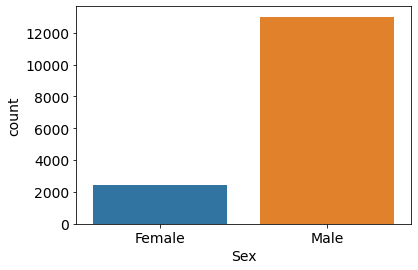

In [7]:
# Data visualization


#Comparing number of vehicle insurance claim between Male and Female

sns.countplot(x = 'Sex', data = dataset)

<AxesSubplot:xlabel='AgeOfPolicyHolder', ylabel='count'>

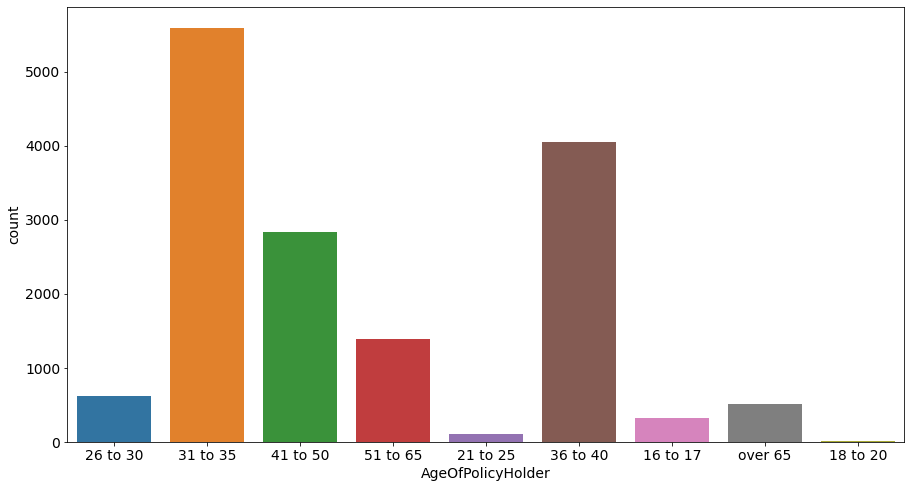

In [8]:
#Comparing age groups with number of vehicle insurance claims

fig_dims = (15, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x = 'AgeOfPolicyHolder', ax = ax, data = dataset)

In [9]:
#Comparing the vehicle insurance claim ratio of male and female among different age groups

age_gender = dataset.groupby(['AgeOfPolicyHolder']).Sex.value_counts(normalize=True)
age_gender.unstack()

Sex,Female,Male
AgeOfPolicyHolder,,
16 to 17,NaN,1.000000
18 to 20,0.066667,0.933333
21 to 25,0.148148,0.851852
26 to 30,0.195759,0.804241
31 to 35,0.201502,0.798498
36 to 40,0.165719,0.834281
41 to 50,0.126945,0.873055
51 to 65,0.068247,0.931753
over 65,0.062992,0.937008


<AxesSubplot:>

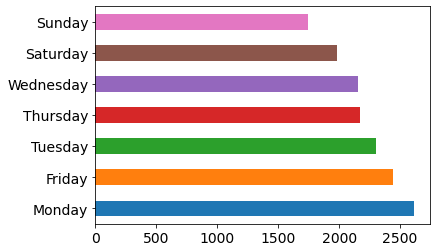

In [10]:
#Comparing day of the week with number of vehicle insurance claim

dataset.DayOfWeek.value_counts().plot(kind='barh', color=['C0','C1','C2','C3','C4','C5','C6'])

<AxesSubplot:xlabel='DayOfWeek', ylabel='count'>

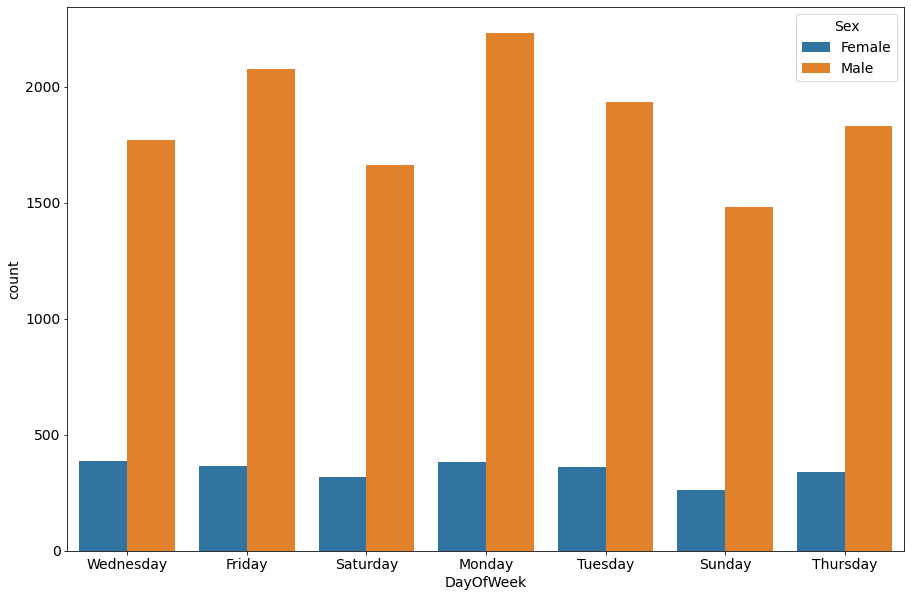

In [11]:
#Comparing day of the week with number of vehicle insurance claim w.r.t male and female

fig_dims = (15, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x = 'DayOfWeek',ax = ax, hue = 'Sex', data = dataset)

<AxesSubplot:xlabel='Make', ylabel='count'>

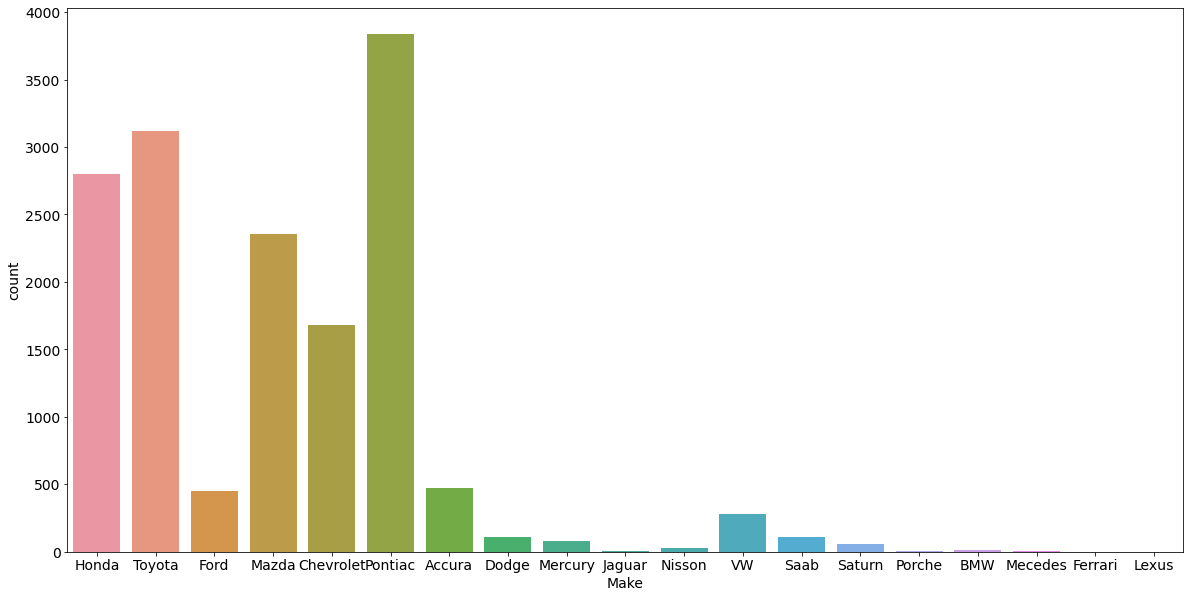

In [12]:
#Comparing vehicle make with number of vehicle insurance claim

fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x = 'Make',ax = ax, data = dataset )

In [13]:
df1 = dataset.groupby('DayOfWeekClaimed').agg({"DayOfWeekClaimed":"count"})
print(df1)

df2 = dataset.groupby('MonthClaimed').agg({"MonthClaimed": "count"})
print(df2)

df3 = dataset.groupby('Age').agg({"Age": "count"})
print(df3)

                  DayOfWeekClaimed
DayOfWeekClaimed                  
0                                1
Friday                        2497
Monday                        3757
Saturday                       127
Sunday                          52
Thursday                      2660
Tuesday                       3375
Wednesday                     2951
              MonthClaimed
MonthClaimed              
0                        1
Apr                   1271
Aug                   1126
Dec                   1146
Feb                   1287
Jan                   1446
Jul                   1225
Jun                   1293
Mar                   1348
May                   1411
Nov                   1285
Oct                   1339
Sep                   1242
     Age
Age     
0    320
16     9
17     6
18    48
19    32
..   ...
76    42
77    29
78    35
79    20
80    32

[66 rows x 1 columns]


In [14]:
dataset = dataset[dataset.DayOfWeekClaimed!=0]
dataset = dataset[dataset.MonthClaimed!=0]
dataset = dataset[dataset.Age!=0]

In [15]:
#Encoding the 

#print(dataset['Fault'].dtype)
dfp = dataset['Fault'].replace({"Policy Holder": 1, "Third Party": 2})
dataset['Fault'] = dfp

dfp = dataset['DayOfWeek'].replace({"Monday": 1, "Tuesday": 2, "Wednesday": 3, "Thursday": 4, "Friday": 5, "Saturday": 6, "Sunday": 7 })
dataset['DayOfWeek'] = dfp
#print(dataset['Fault'].dtype)

dfp = dataset['AccidentArea'].replace({"Urban": 1, "Rural": 2})
dataset['AccidentArea'] = dfp

dfp = dataset['DayOfWeekClaimed'].replace({"Monday": 1, "Tuesday": 2, "Wednesday": 3, "Thursday": 4, "Friday": 5, "Saturday": 6, "Sunday": 7 })
dataset['DayOfWeekClaimed'] = dfp

dfp = dataset['PoliceReportFiled'].replace({"No": 0, "Yes": 1})
dataset['PoliceReportFiled'] = dfp

dfp = dataset['WitnessPresent'].replace({"No": 0, "Yes": 1})
dataset['WitnessPresent'] = dfp

dfp = dataset['AgentType'].replace({"External": 1, "Internal": 2})
dataset['AgentType'] = dfp

#replacing the categorical value 2 to 4 with mean 3 and more than 4 with arbitrary value 7
dfp = dataset['PastNumberOfClaims'].replace({"none": 0, "1": 1, "2 to 4": 3, "more than 4": 7})
dataset['PastNumberOfClaims'] = dfp

dfp = dataset['Make'].replace({"Honda": 1, "Toyota": 2, "Ford": 3, "Mazda": 4, "Chevrolet": 5, "Pontiac": 6, "Accura": 7, "Dodge": 8,
 "Mercury": 9, "Jaguar": 10, "Nisson": 11, "VW": 12, "Saab": 13, "Saturn": 14, "Porche": 15, "BMW":16, "Mecedes": 17,
 "Ferrari": 18, "Lexus": 19 })
dataset['Make'] = dfp

dfp = dataset['VehicleCategory'].replace({"Sport": 1, "Utility": 2, "Sedan": 3})
dataset['VehicleCategory'] = dfp


dfp = dataset['AgeOfVehicle'].replace({"new": 0.1, "2 years": 2.0, "3 years": 3.0, "4 years": 4.0, "5 years": 5.0, "6 years": 6.0, "7 years": 7, "more than 7": 8})
dataset['AgeOfVehicle'] = dfp


dfp = dataset['Days_Policy_Accident'].replace({"none": 0, "1 to 7": 4, "8 to 15": 12, "15 to 30": 23, "more than 30": 36 })
dataset['Days_Policy_Accident'] = dfp

dfp = dataset['Days_Policy_Claim'].replace({"none": 0, "8 to 15": 12, "15 to 30": 23, "more than 30": 36 })
dataset['Days_Policy_Claim'] = dfp

dfp = dataset['NumberOfCars'].replace({"1 vehicle": 1, "2 vehicles": 2, "3 to 4": 4, "5 to 8": 7, "more than 8": 9 })
dataset['NumberOfCars'] = dfp


 
dfp1 = dataset['PolicyType']

dfp =  dataset['PolicyType'].replace({"Sport - Liability":"Liability", "Sport - Collision": "Collision", "Sedan - Liability": "Liability",
 "Utility - All Perils": "All Perils", "Sedan - All Perils": "All Perils", "Sedan - Collision": "Collision",
 "Utility - Collision": "Collision", "Utility - Liability": "Liability", "Sport - All Perils": "All Perils" })


 
print("Columns PolicyType and BasePolicy are the same? ",dfp.equals(dataset['BasePolicy']))

dfp =  dataset['PolicyType'].replace({"Sport - Liability": 1, "Sport - Collision": 1, "Sedan - Liability": 3,
 "Utility - All Perils": 2, "Sedan - All Perils": 3, "Sedan - Collision": 3,
 "Utility - Collision": 2, "Utility - Liability": 2, "Sport - All Perils": 1 })

dataset['PolicyType'] = dfp

dfp = dataset['BasePolicy'].replace({"Liability": 1, "Collision": 2, "All Perils": 3})
dataset['BasePolicy'] = dfp

#1 year' 'no change' '4 to 8 years' '2 to 3 years' 'under 6 months: using max values for this case
dfp = dataset['AddressChange_Claim'].replace({"no change": 0, "under 6 months": 0.5, "1 year": 1, "2 to 3 years": 3, "4 to 8 years": 8})
dataset['AddressChange_Claim'] = dfp

#none' 'more than 5' '3 to 5' '1 to 2
dfp = dataset['NumberOfSuppliments'].replace({"none": 0, "1 to 2": 2, "3 to 5": 4, "more than 5": 6})
dataset['NumberOfSuppliments'] = dfp

#more than 69000' '20000 to 29000' '30000 to 39000' 'less than 20000' '40000 to 59000' '60000 to 69000
dfp = dataset['VehiclePrice'].replace({"less than 20000": 15000, "20000 to 29000": 25000, "30000 to 39000": 35000, "40000 to 59000": 50000, "60000 to 69000": 65000, "more than 69000": 80000})
dataset['VehiclePrice'] = dfp

#26 to 30' '31 to 35' '41 to 50' '51 to 65' '21 to 25' '36 to 40' '16 to 17' 'over 65' '18 to 20
dfp = dataset['AgeOfPolicyHolder'].replace({"16 to 17": 17, "18 to 20": 20, "21 to 25": 23, "26 to 30": 28, "31 to 35": 33, "36 to 40": 38, "41 to 50": 45, "51 to 65": 58, "over 65": 72})
dataset['AgeOfPolicyHolder'] = dfp




print("Columns PolicyType and BasePolicy are the same? ",dataset['Days_Policy_Accident'].equals(dataset['Days_Policy_Claim']))



#dataset.drop('PolicyNumber', axis = 1, inplace = True)

dataset.head()

Columns PolicyType and BasePolicy are the same?  True
Columns PolicyType and BasePolicy are the same?  False


,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,3,1,1,2,Jan,1,Female,Single,21,1,1,1,80000,0,1,12,300,1,36,36,0,3.0,28,0,0,1,0,1.0,4,1994,1
1,Jan,3,3,1,1,1,Jan,4,Male,Single,34,1,1,1,80000,0,2,15,400,4,36,36,0,6.0,33,1,0,1,0,0.0,1,1994,2
2,Oct,5,5,1,1,4,Nov,2,Male,Married,47,1,1,1,80000,0,3,7,400,3,36,36,1,7.0,45,0,0,1,0,0.0,1,1994,2
3,Jun,2,6,2,2,5,Jul,1,Male,Married,65,2,3,1,25000,0,4,4,400,2,36,36,1,8.0,58,1,0,1,6,0.0,1,1994,1
4,Jan,5,1,1,1,2,Feb,2,Female,Single,27,2,1,1,80000,0,5,3,400,1,36,36,0,5.0,33,0,0,1,0,0.0,1,1994,2


In [16]:
df1 = dataset.groupby('DayOfWeekClaimed').agg({"DayOfWeekClaimed":"count"})
print(df1)

df2 = dataset.groupby('MonthClaimed')['MonthClaimed'].count()
print(df2)

df3 = dataset.groupby('Age').agg({"Age": "count"})
print(df3)


#plt.hist(df2['MonthClaimed'])

                  DayOfWeekClaimed
DayOfWeekClaimed                  
1                             3684
2                             3297
3                             2890
4                             2616
5                             2434
6                              127
7                               52
MonthClaimed
Apr    1217
Aug    1118
Dec    1139
Feb    1240
Jan    1375
Jul    1216
Jun    1271
Mar    1298
May    1376
Nov    1276
Oct    1337
Sep    1237
Name: MonthClaimed, dtype: int64
     Age
Age     
16     9
17     6
18    48
19    32
20    28
..   ...
76    42
77    29
78    35
79    20
80    32

[65 rows x 1 columns]


In [17]:
df4 = dataset['MonthClaimed'].unique()
print(df4)


['Jan' 'Nov' 'Jul' 'Feb' 'Dec' 'Apr' 'Mar' 'Aug' 'May' 'Jun' 'Sep' 'Oct']


In [18]:
monthlabel = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov':11, 'Dec': 12}
dataset.head()
#dataset['Month'].apply(lambda x: monthlabel[x])


,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,3,1,1,2,Jan,1,Female,Single,21,1,1,1,80000,0,1,12,300,1,36,36,0,3.0,28,0,0,1,0,1.0,4,1994,1
1,Jan,3,3,1,1,1,Jan,4,Male,Single,34,1,1,1,80000,0,2,15,400,4,36,36,0,6.0,33,1,0,1,0,0.0,1,1994,2
2,Oct,5,5,1,1,4,Nov,2,Male,Married,47,1,1,1,80000,0,3,7,400,3,36,36,1,7.0,45,0,0,1,0,0.0,1,1994,2
3,Jun,2,6,2,2,5,Jul,1,Male,Married,65,2,3,1,25000,0,4,4,400,2,36,36,1,8.0,58,1,0,1,6,0.0,1,1994,1
4,Jan,5,1,1,1,2,Feb,2,Female,Single,27,2,1,1,80000,0,5,3,400,1,36,36,0,5.0,33,0,0,1,0,0.0,1,1994,2


In [19]:
print(dataset['Month'].dtype)

print(dataset['MonthClaimed'].dtype)



object
object


In [20]:
encoder1= ce.OrdinalEncoder(cols=['Month'],return_df=True,
                           mapping=[{'col':'Month',
'mapping':{'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov':11, 'Dec': 12}}])


#Original data
#train_df
dataset = encoder1.fit_transform(dataset)

dataset.head()







,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,12,5,3,1,1,2,Jan,1,Female,Single,21,1,1,1,80000,0,1,12,300,1,36,36,0,3.0,28,0,0,1,0,1.0,4,1994,1
1,1,3,3,1,1,1,Jan,4,Male,Single,34,1,1,1,80000,0,2,15,400,4,36,36,0,6.0,33,1,0,1,0,0.0,1,1994,2
2,10,5,5,1,1,4,Nov,2,Male,Married,47,1,1,1,80000,0,3,7,400,3,36,36,1,7.0,45,0,0,1,0,0.0,1,1994,2
3,6,2,6,2,2,5,Jul,1,Male,Married,65,2,3,1,25000,0,4,4,400,2,36,36,1,8.0,58,1,0,1,6,0.0,1,1994,1
4,1,5,1,1,1,2,Feb,2,Female,Single,27,2,1,1,80000,0,5,3,400,1,36,36,0,5.0,33,0,0,1,0,0.0,1,1994,2


In [21]:
encoder2= ce.OrdinalEncoder(cols=['MonthClaimed'],return_df=True, 
                           mapping=[{'col':'MonthClaimed',
'mapping':{'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov':11, 'Dec': 12}}])

#Original data
#train_df
dataset = encoder2.fit_transform(dataset)
dataset.head()



,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,12,5,3,1,1,2,1,1,Female,Single,21,1,1,1,80000,0,1,12,300,1,36,36,0,3.0,28,0,0,1,0,1.0,4,1994,1
1,1,3,3,1,1,1,1,4,Male,Single,34,1,1,1,80000,0,2,15,400,4,36,36,0,6.0,33,1,0,1,0,0.0,1,1994,2
2,10,5,5,1,1,4,11,2,Male,Married,47,1,1,1,80000,0,3,7,400,3,36,36,1,7.0,45,0,0,1,0,0.0,1,1994,2
3,6,2,6,2,2,5,7,1,Male,Married,65,2,3,1,25000,0,4,4,400,2,36,36,1,8.0,58,1,0,1,6,0.0,1,1994,1
4,1,5,1,1,1,2,2,2,Female,Single,27,2,1,1,80000,0,5,3,400,1,36,36,0,5.0,33,0,0,1,0,0.0,1,1994,2


In [22]:
encoder3= ce.OrdinalEncoder(cols=['Sex'],return_df=True, 
                           mapping=[{'col':'Sex',
'mapping':{'Female': 0, 'Male': 1}}])

#Original data
#train_df
dataset = encoder3.fit_transform(dataset)

encoder4 = ce.OrdinalEncoder(cols=['MaritalStatus'],return_df=True, 
                           mapping=[{'col':'MaritalStatus',
'mapping':{'Single': 1, 'Married': 2, 'Widow': 3, 'Divorced':4 }}])

#Original data
#train_df
dataset = encoder4.fit_transform(dataset)

dataset.head()



,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,12,5,3,1,1,2,1,1,0,1,21,1,1,1,80000,0,1,12,300,1,36,36,0,3.0,28,0,0,1,0,1.0,4,1994,1
1,1,3,3,1,1,1,1,4,1,1,34,1,1,1,80000,0,2,15,400,4,36,36,0,6.0,33,1,0,1,0,0.0,1,1994,2
2,10,5,5,1,1,4,11,2,1,2,47,1,1,1,80000,0,3,7,400,3,36,36,1,7.0,45,0,0,1,0,0.0,1,1994,2
3,6,2,6,2,2,5,7,1,1,2,65,2,3,1,25000,0,4,4,400,2,36,36,1,8.0,58,1,0,1,6,0.0,1,1994,1
4,1,5,1,1,1,2,2,2,0,1,27,2,1,1,80000,0,5,3,400,1,36,36,0,5.0,33,0,0,1,0,0.0,1,1994,2


In [23]:
dataset['MonthClaimed'].astype('int64')
print(dataset['MonthClaimed'].dtype," and ", dataset['WeekOfMonth'].dtype)



int64  and  int64


In [24]:
y = dataset['FraudFound_P']
y

0        0
1        0
2        0
3        0
4        0
        ..
15415    1
15416    0
15417    1
15418    0
15419    1
Name: FraudFound_P, Length: 15100, dtype: category
Categories (2, int64): [0, 1]

Implementation of machine learning model (Random Forest)

In [25]:
# Create our X and y data    
result = []
for x in dataset.columns:
    if x != 'FraudFound_P':
        result.append(x)

X = dataset[result].values
y = dataset['FraudFound_P'].values

#Training/testing split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=44)




The accuracy is:  94.41059602649007 %


Text(0.5, 1.0, 'Visualizing Important Features for Random Forest')

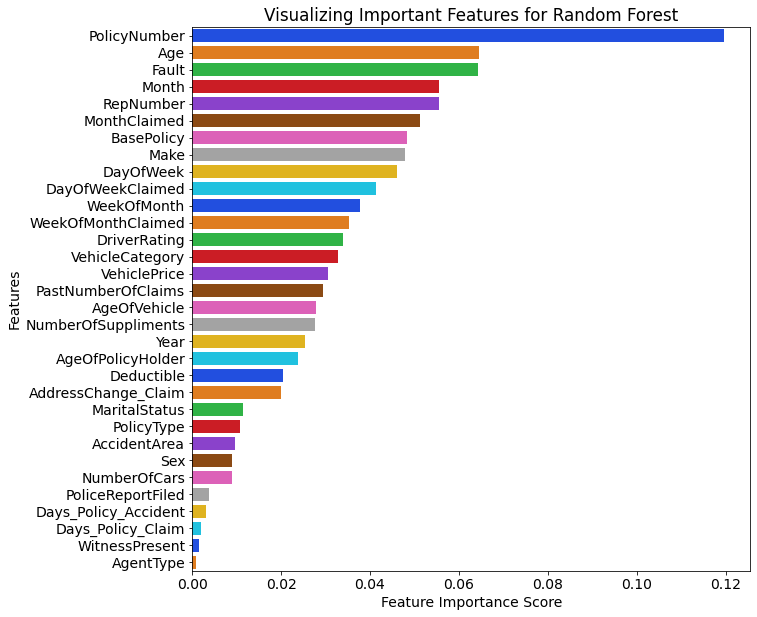

In [26]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
#Instantiate the model with 10 trees and entropy as splitting criteria
Random_Forest_model = RandomForestClassifier(n_estimators=10,criterion="entropy")

#Train the model
Random_Forest_model.fit(X_train, y_train)

#make predictions
y_pred = Random_Forest_model.predict(X_test)

#Calculate accuracy metric
accuracy = accuracy_score(y_pred, y_test)
print('The accuracy is: ',accuracy*100,'%')

#Features Contribution
fig_dims = (10, 10)
fig, ax = plt.subplots(figsize=fig_dims)
feature_imp = pd.Series(Random_Forest_model.feature_importances_,index=result).sort_values(ascending=False)
sns.barplot(x=feature_imp, y=feature_imp.index, ax = ax, palette = "bright")
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features for Random Forest")

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy'],
      dtype='object')


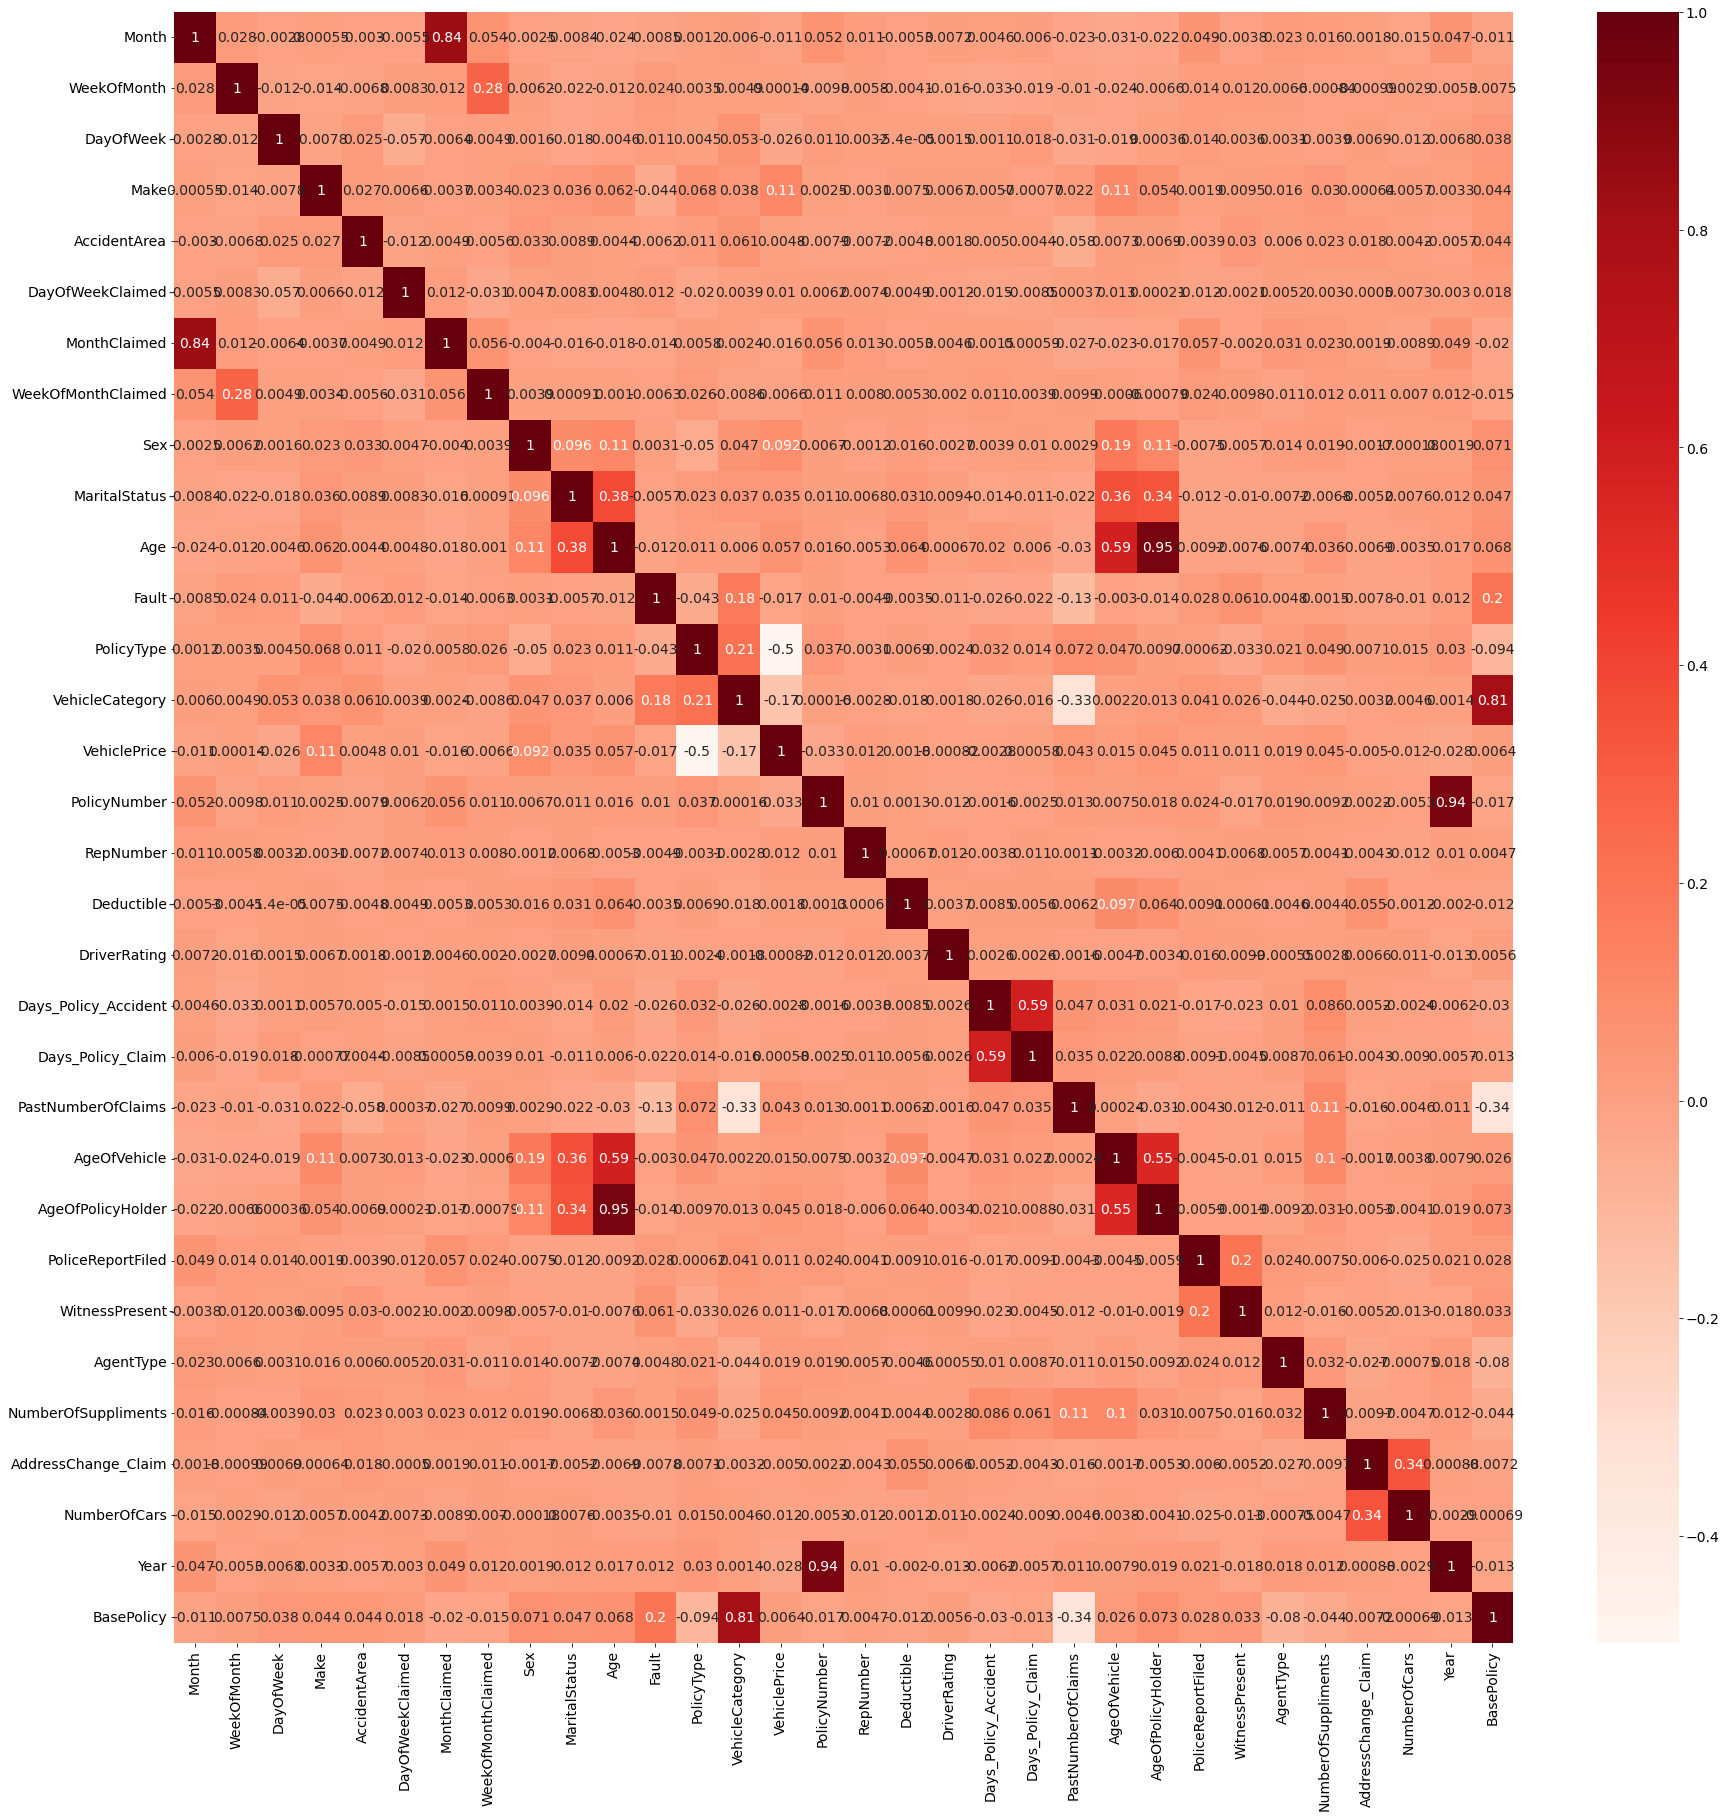

KeyError: 'FraudFound_P'

In [27]:
#dataset.drop('FraudFound_P', axis = 1, inplace = True)
print(dataset.columns)

# Set up the matplotlib figure
plt.figure(figsize = (30,30))
# Compute the correlation matrix
cor = dataset.corr()
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

#Correlation with output variable
cor_target = abs(cor["FraudFound_P"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.1]
relevant_features

In [ ]:
fig = plt.figure(figsize=(15,10))

#investigates the accuracy over a range of estimators plotting the result
#THIS TAKES A WHILE TO RUN!!
accuracy_data = []
nums = []
for i in range(1,128):
    rf_model = RandomForestClassifier(n_estimators=i,criterion="entropy")
    rf_model.fit(X_train, y_train)
    y_model = rf_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_model)
    accuracy_data.append(accuracy)
    nums.append(i)
    
#print(accuracy_data)
plt.plot(nums,accuracy_data)
plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Accuracy")
plt.show()